In [12]:
%matplotlib inline
import numpy as np

\begin{equation}
\mathbf{T} = \begin{bmatrix} 90& -30& 0\\ -30& 120& -30 \\ 0 &-30&  90 \end{bmatrix} MPa
\end{equation}

In [6]:
T= np.array([[90, -30, 0], 
            [-30, 120, -30],
            [0, -30, 90]])
print("T={}".format(T))

T=[[ 90 -30   0]
 [-30 120 -30]
 [  0 -30  90]]


a) Establish the principal stresses $\sigma_1$, $\sigma_2$ and $\sigma_3$, and the corresponding directions $\mathbf{n}_1$, $\mathbf{n}_2$ and $\mathbf{n}_3$ with hand-calculations.

(array([ 150.,   90.,   60.]),
 array([[ -4.08248290e-01,  -7.07106781e-01,   5.77350269e-01],
        [  8.16496581e-01,   1.35902313e-16,   5.77350269e-01],
        [ -4.08248290e-01,   7.07106781e-01,   5.77350269e-01]]))

b) Find the numerical values for the three stress invariants $I$, $II$ and $III$.

In [9]:
I = np.trace(T)
II = 0.5*(np.trace(T)**2 - np.trace(np.dot(T,T)))
III = np.linalg.det(T)
print(I,II,III)

300 27900.0 810000.0


c) Use the invariants to establish the characteristic polynomial from the eigenvalue problem. Furthermore, plot the polynomial and graphically determine the principal stresses.

In [14]:
polynomial = lambda x: x**3 - I*x**2 + II*x - III

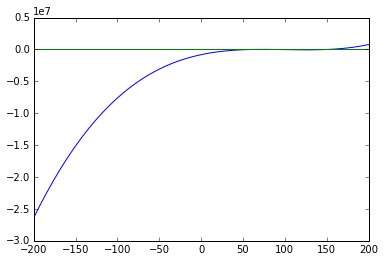

In [30]:
from matplotlib import pyplot as plt
lower_bound = -200
upper_bound = 200
n_pts = 50
xvals = np.linspace(lower_bound,upper_bound,n_pts) # Define points at which to evaluate the polynomial
plt.plot(xvals,polynomial(xvals)) # Plot the polynomial at those points
plt.plot(xvals,0*xvals) # Plot a horizontal line at y=0 at the same points


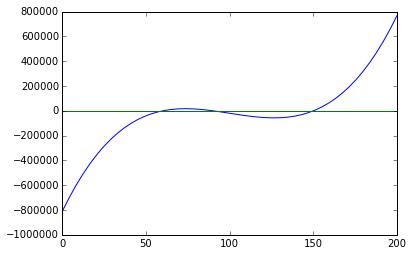

In [29]:
xvals = np.linspace(0,upper_bound,n_pts)
plt.plot(xvals,polynomial(xvals))
plt.plot(xvals,0*xvals)


d) Use `fsolve` from the `scipy.optimize` library to find the solutions of the characteristic polynom.

In [32]:
from scipy import optimize as opt
initial_guess = 50
print(opt.fsolve(polynomial,initial_guess))
initial_guess = 100
print(opt.fsolve(polynomial,initial_guess))
initial_guess = 160
print(opt.fsolve(polynomial,initial_guess))


[ 60.]
[ 90.]
[ 150.]


e) Use `eig` to directly solve for the principal stresses and corresponding directions.

In [34]:
lambdas, ns = np.linalg.eig(T)

f) Plot the principal direction vectors $\mathbf{n}_i$ (i=1,2,3).

(-1, 1)

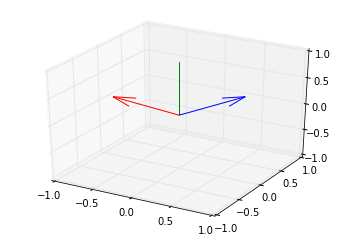

In [59]:
from mpl_toolkits.mplot3d import Axes3D
#print(origin[:,0],ns[:,0])
#plt.quiver(origin[:,0],ns[:,0])
#ax.quiver(0,0,0,ns[0,0],ns[0,1],ns[0,2],pivot="tip")
#ax.quiver(0,0,0,ns[1,0],ns[1,1],ns[1,2],pivot="tip")
#ax.quiver(0,0,0,ns[2,0],ns[2,1],ns[2,2],pivot="tip")
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(ns[0,0],ns[0,1],ns[0,2],ns[0,0],ns[0,1],ns[0,2],   # data
          length=1,                      # arrow length
          color='red'                   # arrow colour
          )

ax.quiver(ns[1,0],ns[1,1],ns[1,2],ns[1,0],ns[1,1],ns[1,2],   # data
          length=1,                      # arrow length
          color='blue'                    # arrow colour
          )

ax.quiver(ns[2,0],ns[2,1],ns[2,2],ns[2,0],ns[2,1],ns[2,2],   # data
          length=1,                      # arrow length
          color='green'                    # arrow colour
          )
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

g) The maximum shear stress is found in an orientation between the directions of the smallest and largest principal stresses, $\sigma_1$ and $\sigma_3$, and in the plane normal to the direction of $\sigma_2$. Determine the orientation where the stress element gets the largest shear stress, and the numerical value of this stress. Plot the found normal vector together with the vectors in f).